#### Este Notebook esta dedicado al analisis de los datos extraidos del banco mundial sobre las tasas de fecundidad.

In [83]:
# Importamos las librerias necesarias para el analisis 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

In [84]:
# Primero cargamos los datos del que se encuentran en formato csv 

data= pd.read_csv('../Data/Data_Fecundidad.csv', sep=',', skiprows=3)
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,4.820000,4.655000,4.471000,4.271000,4.059000,3.842000,...,1.972000,1.953000,1.839000,1.587000,1.486000,1.325000,1.180000,1.179000,NaN,NaN
1,Africa Eastern and Southern,AFE,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.724125,6.742752,6.762930,6.778712,6.788420,6.800322,...,4.677618,4.615670,4.570409,4.527705,4.482898,4.416900,4.354709,4.288788,NaN,NaN
2,Afghanistan,AFG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.282000,7.284000,7.292000,7.302000,7.304000,7.305000,...,5.405000,5.262000,5.129000,5.002000,4.870000,4.750000,4.643000,4.523000,NaN,NaN
3,Africa Western and Central,AFW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.458448,6.471518,6.491826,6.506088,6.525355,6.541102,...,5.385059,5.328709,5.255345,5.186319,5.118932,5.049329,4.978662,4.897322,NaN,NaN
4,Angola,AGO,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.708000,6.790000,6.872000,6.954000,7.036000,7.116000,...,5.774000,5.686000,5.600000,5.519000,5.442000,5.371000,5.304000,5.209000,NaN,NaN


#### El Obejetivo principal de este proyecto estudiar las tasas de fecundidad en la region de America del Sur, por lo que solo se seleccionaran los paises de dicha region, y el tiempo de estudio sera de 40 años, por lo se escogeran los datos desde 1980 hasta los mas recientes

#### Antes de filtar los datos, por lo que decidimos seleccionar, como se puede ver que tenemos nuestra base datos en formato Width, lo cual no es muy practico para su manejo, por lo que la transoformamos en formato Long

In [85]:
# Pasamos de formato width a long nuestra base de datos usando el metodo .melt

data_long = pd.melt(data, 
                    id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], 
                    var_name='Year', 
                    value_name='Fertility Rate')

data_long

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Fertility Rate
0,Aruba,ABW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1960,4.820000
1,Africa Eastern and Southern,AFE,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1960,6.724125
2,Afghanistan,AFG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1960,7.282000
3,Africa Western and Central,AFW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1960,6.458448
4,Angola,AGO,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1960,6.708000
...,...,...,...,...,...,...
17285,Kosovo,XKX,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,Unnamed: 68,NaN
17286,"Yemen, Rep.",YEM,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,Unnamed: 68,NaN
17287,South Africa,ZAF,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,Unnamed: 68,NaN
17288,Zambia,ZMB,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,Unnamed: 68,NaN


In [86]:
# Mostramos la informacion del los datos

data_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17290 entries, 0 to 17289
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    17290 non-null  object 
 1   Country Code    17290 non-null  object 
 2   Indicator Name  17290 non-null  object 
 3   Indicator Code  17290 non-null  object 
 4   Year            17290 non-null  object 
 5   Fertility Rate  16137 non-null  float64
dtypes: float64(1), object(5)
memory usage: 810.6+ KB


In [87]:
# Como se puede ver la Variable 'Year' esta en tipo object, por lo que la transformamos en Int para poder usarla en flitros
# Filtrar valores no deseados en la columna Year
data_long = data_long[data_long['Year'] != 'Unnamed: 68']
data_long['Year']= pd.to_numeric(data_long['Year'], errors= 'coerce')

C:\Users\HP\AppData\Local\Temp\ipykernel_15676\3469371376.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [88]:
# Vemos de nuevo la informacion y ya tenemos los años como variable numerica
data_long.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17024 entries, 0 to 17023
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    17024 non-null  object 
 1   Country Code    17024 non-null  object 
 2   Indicator Name  17024 non-null  object 
 3   Indicator Code  17024 non-null  object 
 4   Year            17024 non-null  int64  
 5   Fertility Rate  16137 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 931.0+ KB


In [89]:
# Ahora vemos los nombre de los paises para poder filtar correctamente 
data_long['Country Name'].unique()

array(['Aruba', 'Africa Eastern and Southern', 'Afghanistan',
       'Africa Western and Central', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia',
       'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas, The',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan',
       'Botswana', 'Central African Republic', 'Canada',
       'Central Europe and the Baltics', 'Switzerland', 'Channel Islands',
       'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Caribbean small states', 'Cuba', 'Curacao', 'Cayman Islands',
       'Cyprus', 'Czechia', 'Germany', 'Djibouti', 'Dominica', 'Denmark',
       'Dominican Republic', 'Algeria',
 

In [90]:
# Creamos una lista con los paises de America del Sur

paises= ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 
        'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela, RB']

# Filtramamos los datos 

data_filtrada= data_long[(data_long['Country Name'].isin(paises)) &  (data_long['Year'].between(1980,2022))]

# Mostramos los datos

data_filtrada

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Fertility Rate
5329,Argentina,ARG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1980,3.301
5348,Bolivia,BOL,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1980,5.474
5349,Brazil,BRA,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1980,4.037
5359,Chile,CHL,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1980,2.744
5365,Colombia,COL,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1980,3.856
...,...,...,...,...,...,...
16678,Peru,PER,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,2022,2.164
16687,Paraguay,PRY,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,2022,2.444
16712,Suriname,SUR,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,2022,2.322
16742,Uruguay,URY,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,2022,1.483


In [91]:
# Por ultimo nos percatamos si hay valores nulos en nuestros datos
data_filtrada.isnull().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
Year              0
Fertility Rate    0
dtype: int64

#### Una vez teniendo los datos ya filtrados y sin nulos procedemos a verlos de manera grafica.

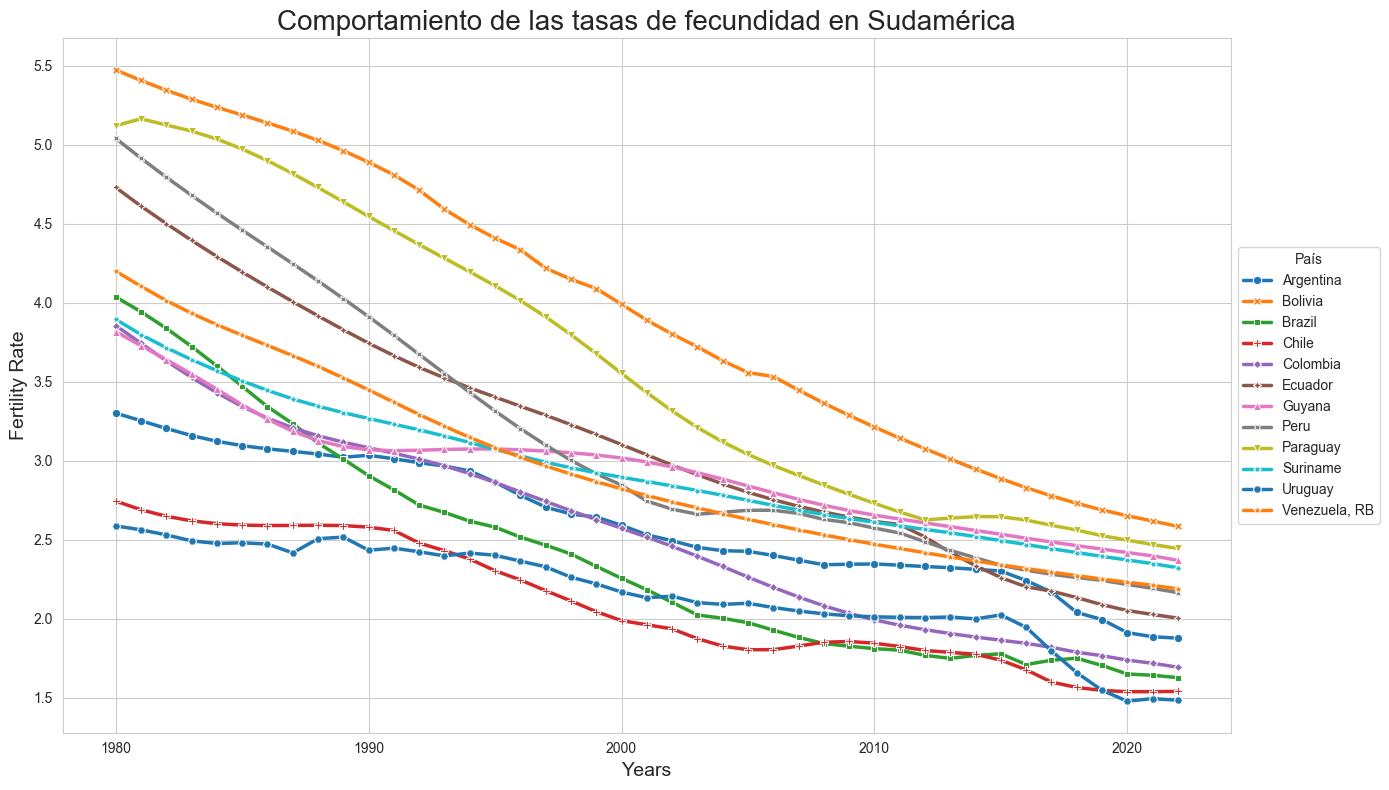

In [92]:
# Establecer el estilo de los gráficos de Seaborn
sns.set_style("whitegrid")

# Crear la figura
plt.figure(figsize=(14, 8))

# Usar una paleta de colores distintiva
palette = sns.color_palette("tab10", len(data_filtrada['Country Name'].unique()))

# Graficar las líneas con diferentes estilos y grosor
sns.lineplot(
    data=data_filtrada, 
    x='Year', 
    y='Fertility Rate', 
    hue='Country Name', 
    style='Country Name', 
    markers=True, 
    dashes=False, 
    palette=palette,
    linewidth=2.5
)

# Agregar título y etiquetas
plt.title('Comportamiento de las tasas de fecundidad en Sudamérica', fontsize=20)
plt.xlabel('Years', fontsize=14)
plt.ylabel('Fertility Rate', fontsize=14)

# Ajustar la leyenda para que no solape con el gráfico
plt.legend(title='País', loc='center left', bbox_to_anchor=(1, 0.5))

# Asegurar que el gráfico se ajuste bien dentro del marco
plt.tight_layout()

# Mostrar el gráfico
plt.show()

#### Ahora usaremos la libreria de Plotly las cual nos permite crear graficos interactivos y hacer el grafico anterior.

In [93]:
# Crear el gráfico interactivo con Plotly Express
fig = px.line(
    data_filtrada, 
    x='Year', 
    y='Fertility Rate', 
    color='Country Name', 
    line_group='Country Name',
    title='Comportamiento de las tasas de fecundidad en Sudamérica',
    labels={'Year': 'Years', 'Fertility Rate': 'Fertility Rate'},
)

# Actualizar el layout para mejorar la presentación
fig.update_layout(
    title_font_size=20,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    legend_title_text='País',
    legend_title_font_size=14,
    legend_itemclick='toggleothers',
    legend_itemdoubleclick='toggle',
    margin=dict(l=0, r=0, t=40, b=0)
)

# Mostrar el gráfico
fig.show()

#### Como se puede observar en el grafico, se evidencia una gran caida en la tasas de fecundidad en los paises sudamericanos. Ahora veremos como es el comportamiento de sudamérica en general 

In [94]:
# Creamos un dataframe que tebga la tasa de fecundidad promedio por año

sudamerica= data_filtrada.groupby('Year').agg({'Fertility Rate':'mean'}).reset_index()

sudamerica.head()

,Year,Fertility Rate
0,1980,4.067000
1,1981,3.993333
2,1982,3.915750
3,1983,3.841000
4,1984,3.770750


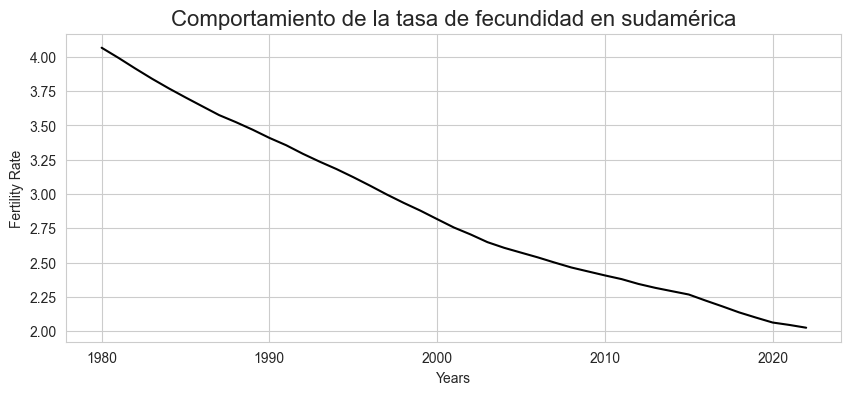

In [95]:
# Definimos el tamaño de la figura

plt.figure(figsize=(10, 4))

# Escogemos el tipo de grafico
sns.lineplot(data= sudamerica, x= 'Year', y= 'Fertility Rate', color= 'black')

# definimos las etiquetas
plt.title('Comportamiento de la tasa de fecundidad en sudamérica', fontsize=16)
plt.xlabel('Years')
plt.ylabel('Fertility Rate')

plt.show()

#### Como podemos observar en a nivel general la tasa de en toda sudamérica tuvo una notable caida.

#### Ahora bien, uno de los objetivos de este proyecto es crear un modelo de series de tiempo que nos ayude a mostrar com se será el comportamiento futuro de estas tasas, por lo que separaremos cada país en una serie individual para el estudio.

In [96]:
## Creamos un ciclo for que nos guarde la informacion por pais

for country in data_filtrada['Country Name'].unique():
    data_country= data_filtrada[data_filtrada['Country Name']== country]
    data_country= data_country[['Year','Country Name','Fertility Rate']]
    
    data_country.to_csv('../Data/Fertility_'+ country +'.csv')

In [98]:
# Guaramos la informaicion de sudamerica en general
sudamerica.to_csv('../Data/Fertility_Sudamerica.csv')